# Import Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import json
from urllib.parse import unquote_plus
import geopandas as gpd
import matplotlib.pyplot as plt
import re

# Map Visualization of Countries with Game Publishing Regulations

<ipython-input-25-6686a9f65bc8>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


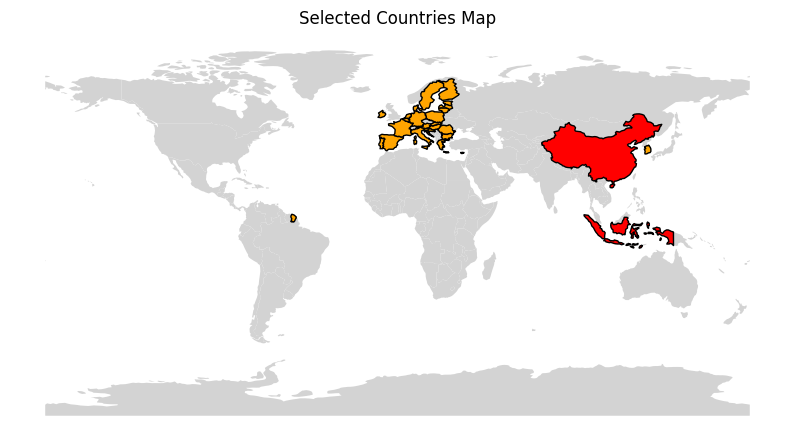

In [ ]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the list of EU countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
                'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
                'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

# Filter the world shapefile for EU countries
countries_orange = world[world.name.isin(eu_countries) | (world.name == 'South Korea')]

# Filter for Indonesia and China
countries_red = world[(world.name == 'Indonesia') | (world.name == 'China')]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')  # Plot world map
countries_orange.plot(ax=ax, color='orange', edgecolor='black')  # Plot selected countries
countries_red.plot(ax=ax, color='red', edgecolor='black')  # Plot selected countries
ax.set_title('Selected Countries Map')
plt.axis('off')
plt.show()


# Scraping Game Developers and Publishers from AGI Website

In [ ]:
# Step 1: Fetch the webpage source code
url = "https://www.agi.or.id"  # Replace with the actual URL
response = requests.get(url)
html = response.text

# Step 2: Parse the HTML
soup = BeautifulSoup(html, "html.parser")

# Step 3: Find all occurrences of the target <div> element
divs = soup.find_all("div", class_="list-item-content__text-wrapper")

# Step 4: Extract the Company Name and Company Type
data = []
for div in divs:
    company_name = div.find("h2", class_="list-item-content__title").text.strip()
    company_type = div.find("p", class_="").text.strip()
    data.append({"Company Name": company_name, "Company Type": company_type})

# Step 5: Create a DataFrame and display as a table
df = pd.DataFrame(data)
print(df)

                  Company Name  \
0                Cipto Adiguno   
1             Adam Ardisasmita   
2           Narendra Wicaksono   
3         Febrianto Nur Anwari   
4              Natasha Violeta   
5          Ardhan Fadhlurahman   
6                  Arya Wibowo   
7                   Ibnu Raziq   
8                 Dina Rahma B   
9                 Brian Chuang   
10              Riris Marpaung   
11               Eva Muliawati   
12              Shieny Aprilia   
13                 Raditya Ami   
14              MassHive Media   
15                     Megaxus   
16                       Agate   
17                   Arsanesia   
18                        Lyto   
19              Mojiken Studio   
20             Wisageni Studio   
21             Toge Production   
22           Digital Happiness   
23                 Algo Studio   
24               Gambir Studio   
25          Gamechanger Studio   
26           Joyseed Gametribe   
27              Meloncat Games   
28           C

In [ ]:
df

,Company Name,Company Type
0,Cipto Adiguno,President
1,Adam Ardisasmita,Vice President
2,Narendra Wicaksono,Treasurer
3,Febrianto Nur Anwari,Dep. of Business Development
4,Natasha Violeta,Dep. of International Relations
5,Ardhan Fadhlurahman,Dep. Industry Relations
6,Arya Wibowo,Dep. of Media Relations
7,Ibnu Raziq,Dep. of Talent Development
8,Dina Rahma B,Internal PR
9,Brian Chuang,Dep. of Sponsorship


In [ ]:
filtered_data = df[14:43]

In [ ]:
filtered_data.reset_index(drop=True)

,Company Name,Company Type
0,MassHive Media,Game Developer
1,Megaxus,Game Publisher
2,Agate,Game Developer
3,Arsanesia,Game Developer
4,Lyto,Game Publisher
5,Mojiken Studio,Game Developer
6,Wisageni Studio,Game Developer
7,Toge Production,Game Developer & Publisher
8,Digital Happiness,Game Developer
9,Algo Studio,Game Developer


In [ ]:
filtered_data.to_csv('agi_game_dev_publisher_list.csv')

In [ ]:
additional_data = {
    'Company Name': ['Mojiken', 'Gamecom Team', 'Stairway Games', 'Storytale', 'Lentera Nusantara', 'XeloGames'],
    'Company Type': ['Game Developer'] * 6
}
df2 = pd.DataFrame(additional_data)

# Concatenate the original and additional DataFrames
filtered_data = pd.concat([filtered_data, df2], ignore_index=True)

In [ ]:
filtered_data

,Company Name,Company Type
0,MassHive Media,Game Developer
1,Megaxus,Game Publisher
2,Agate,Game Developer
3,Arsanesia,Game Developer
4,Lyto,Game Publisher
5,Mojiken Studio,Game Developer
6,Wisageni Studio,Game Developer
7,Toge Production,Game Developer & Publisher
8,Digital Happiness,Game Developer
9,Algo Studio,Game Developer


In [ ]:
filtered_data = filtered_data[filtered_data['Company Type'].str.contains('Game Developer')]
filtered_data

,Company Name,Company Type
0,MassHive Media,Game Developer
2,Agate,Game Developer
3,Arsanesia,Game Developer
5,Mojiken Studio,Game Developer
6,Wisageni Studio,Game Developer
7,Toge Production,Game Developer & Publisher
8,Digital Happiness,Game Developer
9,Algo Studio,Game Developer
10,Gambir Studio,Game Developer
11,Gamechanger Studio,Game Developer


In [ ]:
filtered_data['Company Name'] = filtered_data['Company Name'].replace('Toge Production', 'Toge Productions')

<ipython-input-9-c473b9c98371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Company Name'] = filtered_data['Company Name'].replace('Toge Production', 'Toge Productions')


In [ ]:
filtered_data['Company Name Modified'] = filtered_data['Company Name'].apply(lambda x: x.replace(' ', '+'))

<ipython-input-10-dd3888f836ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Company Name Modified'] = filtered_data['Company Name'].apply(lambda x: x.replace(' ', '+'))


In [ ]:
filtered_data

,Company Name,Company Type,Company Name Modified
0,MassHive Media,Game Developer,MassHive+Media
2,Agate,Game Developer,Agate
3,Arsanesia,Game Developer,Arsanesia
5,Mojiken Studio,Game Developer,Mojiken+Studio
6,Wisageni Studio,Game Developer,Wisageni+Studio
7,Toge Productions,Game Developer & Publisher,Toge+Productions
8,Digital Happiness,Game Developer,Digital+Happiness
9,Algo Studio,Game Developer,Algo+Studio
10,Gambir Studio,Game Developer,Gambir+Studio
11,Gamechanger Studio,Game Developer,Gamechanger+Studio


# Scraping Steam Games from List of Indonesian Game Developers

In [ ]:
link = 'https://store.steampowered.com/search/results'
head = {'cookie': 'sessionid=cd46137aee87759ca68f1347'}

try:
    os.mkdir('resultfile')
except FileExistsError:
    pass

def get_pagination(game):
    param = {
        'developer': unquote_plus(game),
        'page': 1,
        'category1': 998,
    }

    req = requests.get(link, headers=head, params=param)
    soup = BeautifulSoup(req.text, 'html.parser')
    try:
      page_item = soup.find('div', 'search_pagination_right').find_all('a')
    except Exception:
      pass

    try:
        total_item = int(page_item[4].text)
    except Exception:
        pass
        try:
            total_item = int(page_item[3].text)
        except Exception:
            pass
            try:
                total_item = int(page_item[2].text)
            except Exception:
                pass
                try:
                    total_item = int(page_item[1].text)
                except Exception:
                    pass
                    try:
                        total_item = int(page_item[0].text)
                    except Exception:
                        pass
    if 'total_item' in locals():
      return 1 + total_item
    else:
      return 1

def scrap():
    count = 0
    datas = []
    for game in filtered_data['Company Name Modified']:
      for j in range(1, get_pagination(game)+1):
          param = {
              'developer': unquote_plus(game),
              'page': 1,
              'category1': 998,
          }
          req = requests.get(link, params=param, headers=head)
          soup = BeautifulSoup(req.text, 'html.parser')

          try:
            conten = soup.find('div', {'id': 'search_resultsRows'}).find_all('a')
            for i in conten:
                url = i['href']
                title = i.find('div', 'col search_name ellipsis').text.strip().replace('\n', ' ')

                release = i.find('div', 'col search_released responsive_secondrow').text
                if release == '':
                    release = 'none'

                data = {
                    'developer': unquote_plus(game),
                    'title': title,
                    'link': url
                }
                datas.append(data)

                count += 1
                print(f'{count}. {title}. developer: {unquote_plus(game)}. link: {url}')
          except Exception:
            pass

    with open(f'resultfile/json_data_{game}.json', 'w+') as outfile:
        json.dump(datas, outfile)

    df = pd.DataFrame(datas)
    df.to_csv(f'resultfile/csv data {game}.csv', index=False)
    df.to_excel(f'resultfile/excel data {game}.xlsx', index=False)
    print('all data was created')

scrap()

1. Potion Permit. developer: MassHive Media. link: https://store.steampowered.com/app/1337760/Potion_Permit/?snr=1_7_7_230_150_1
2. Azure Saga: Pathfinder. developer: MassHive Media. link: https://store.steampowered.com/app/672590/Azure_Saga_Pathfinder/?snr=1_7_7_230_150_1
3. Valthirian Arc: Hero School Story. developer: Agate. link: https://store.steampowered.com/app/785850/Valthirian_Arc_Hero_School_Story/?snr=1_7_7_230_150_1
4. Celestian Tales: Realms Beyond. developer: Agate. link: https://store.steampowered.com/app/684700/Celestian_Tales_Realms_Beyond/?snr=1_7_7_230_150_1
5. Stellarace (Demo). developer: Agate. link: https://store.steampowered.com/app/2351820/Stellarace_Demo/?snr=1_7_7_230_150_1
6. Tirta. developer: Agate. link: https://store.steampowered.com/app/2449050/Tirta/?snr=1_7_7_230_150_1
7. Project UNSEEK. developer: Arsanesia. link: https://store.steampowered.com/app/1758470/Project_UNSEEK/?snr=1_7_7_230_150_1
8. KISS: K-pop Idol StorieS - Road to Debut. developer: Wisa

In [ ]:
df = pd.read_csv('indonesian_steam_games.csv')

In [ ]:
df

,developer,title,link
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...


# Scraping Publisher of Steam Games

In [ ]:
# Function to extract publisher from a given link
def extract_publisher(link):
    req = requests.get(link)
    soup = BeautifulSoup(req.text, 'html.parser')
    dev_rows = soup.find_all('div', class_='dev_row')
    if len(dev_rows) >= 2:
        a_element = dev_rows[1].find('a')
        if a_element:
            publisher = a_element.text.strip()
            return publisher
    return None

# Apply function to 'link' column to extract 'publisher' column
df['publisher'] = df['link'].apply(extract_publisher)

# Display the modified DataFrame
print(df)

            developer                                        title  \
0      MassHive Media                                Potion Permit   
1      MassHive Media                       Azure Saga: Pathfinder   
2               Agate            Valthirian Arc: Hero School Story   
3               Agate               Celestian Tales: Realms Beyond   
4               Agate                            Stellarace (Demo)   
5               Agate                                        Tirta   
6           Arsanesia                               Project UNSEEK   
7     Wisageni Studio     KISS: K-pop Idol StorieS - Road to Debut   
8    Toge Productions                                  Coffee Talk   
9    Toge Productions  Coffee Talk Episode 2: Hibiscus & Butterfly   
10   Toge Productions                   Infectonator 3: Apocalypse   
11   Toge Productions                               My Lovely Wife   
12   Toge Productions                      Infectonator: Survivors   
13   Toge Production

In [ ]:
df

,developer,title,link,publisher
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions


In [ ]:
df['publisher'].unique()

array(['PQube', 'MassHive Media', 'Digital Tribe', 'Agate', 'Arsanesia',
       'Wisageni Studio', 'Toge Productions', 'Armor Games Studios',
       'Neon Doctrine', 'Modern Wolf', 'Digital Happiness',
       'Rolling Glory Jam', 'Fellow Traveller', 'Gaco Games', 'Mojiken',
       'Freedom Games', 'Gamecom Team', 'Humble Games', 'Storytale',
       'Aksys Games', 'Headup Publishing'], dtype=object)

In [ ]:
sorted(df['publisher'].unique())

['Agate',
 'Aksys Games',
 'Armor Games Studios',
 'Arsanesia',
 'Digital Happiness',
 'Digital Tribe',
 'Fellow Traveller',
 'Freedom Games',
 'Gaco Games',
 'Gamecom Team',
 'Headup Publishing',
 'Humble Games',
 'MassHive Media',
 'Modern Wolf',
 'Mojiken',
 'Neon Doctrine',
 'PQube',
 'Rolling Glory Jam',
 'Storytale',
 'Toge Productions',
 'Wisageni Studio']

In [ ]:
publisher_mapping = pd.read_excel('publisher_mapping.xlsx')

In [ ]:
publisher_mapping = publisher_mapping[['Publisher','Indonesian Legal Entity','Indonesian Company']]

In [ ]:
publisher_mapping

,Publisher,Indonesian Legal Entity,Indonesian Company
0,Agate,1,1
1,Aksys Games,0,0
2,Armor Games Studios,0,0
3,Arsanesia,1,1
4,Digital Happiness,1,1
5,Digital Tribe,0,0
6,Fellow Traveller,0,0
7,Freedom Games,0,0
8,Gaco Games,0,1
9,Gamecom Team,1,1


In [ ]:
publisher_mapping.rename(columns = {'Publisher':'publisher'}, inplace = True)

<ipython-input-24-86d0dc89c83e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisher_mapping.rename(columns = {'Publisher':'publisher'}, inplace = True)


In [ ]:
df

,developer,title,link,publisher
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions


In [ ]:
combined_df = pd.merge(df, publisher_mapping, on='publisher', how='left')

In [ ]:
combined_df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1


In [ ]:
def determine_category(row):
    if row['Indonesian Legal Entity'] == 1:
        return 'Indonesian Legal Entity'
    elif row['Indonesian Legal Entity'] == 0 and row['Indonesian Company'] == 1:
        return 'Indonesian Company, not a Legal Entity'
    else:
        return 'Non Indonesian Company'

# Apply the function to create the new 'category' column
combined_df['category'] = combined_df.apply(determine_category, axis=1)

In [ ]:
combined_df.to_pickle('steam_games.pkl')

In [ ]:
combined_df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company,category
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0,Non Indonesian Company
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1,Indonesian Legal Entity
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0,Non Indonesian Company
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0,Non Indonesian Company
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1,Indonesian Legal Entity
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1,Indonesian Legal Entity
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1,Indonesian Legal Entity
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1,Indonesian Legal Entity
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1,Indonesian Legal Entity
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1,Indonesian Legal Entity


#Scraping All Time Peak Players and Review Counts

In [ ]:
df = pd.read_pickle('steam_games.pkl')

In [ ]:
df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company,category
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0,Non Indonesian Company
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1,Indonesian Legal Entity
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0,Non Indonesian Company
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0,Non Indonesian Company
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1,Indonesian Legal Entity
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1,Indonesian Legal Entity
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1,Indonesian Legal Entity
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1,Indonesian Legal Entity
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1,Indonesian Legal Entity
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1,Indonesian Legal Entity


In [ ]:
def extract_game_id(link):
    # Regular expression pattern to match the game ID in the URL
    pattern = r'/app/(\d+)/'

    # Search for the pattern in the link
    match = re.search(pattern, link)

    if match:
        # Extract the game ID from the matched group
        game_id = match.group(1)
        return game_id
    else:
        return None

# Extract game ID from the link and save it to a new column 'game_id'
df['game_id'] = df['link'].apply(extract_game_id)

In [ ]:
df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company,category,game_id
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0,Non Indonesian Company,1337760
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1,Indonesian Legal Entity,672590
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0,Non Indonesian Company,785850
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0,Non Indonesian Company,684700
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1,Indonesian Legal Entity,2351820
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1,Indonesian Legal Entity,2449050
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1,Indonesian Legal Entity,1758470
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1,Indonesian Legal Entity,1662160
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1,Indonesian Legal Entity,914800
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1,Indonesian Legal Entity,1663220


In [ ]:
def scrape_all_time_peak(game_id):
    url = f"https://steamcharts.com/app/{game_id}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        peak_element = soup.find_all('div', class_='app-stat')
        if peak_element:
            peak_number = peak_element[2]
            peak_number = peak_number.find('span', class_='num').get_text().replace(',', '')
            return int(peak_number)
    return None

# Scrape all-time peak for each game ID and save it to a new column 'all_time_peak'
df['all_time_peak'] = df['game_id'].apply(scrape_all_time_peak)

In [ ]:
df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company,category,game_id,all_time_peak
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0,Non Indonesian Company,1337760,4894.0
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1,Indonesian Legal Entity,672590,NaN
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0,Non Indonesian Company,785850,284.0
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0,Non Indonesian Company,684700,NaN
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1,Indonesian Legal Entity,2351820,NaN
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1,Indonesian Legal Entity,2449050,NaN
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1,Indonesian Legal Entity,1758470,NaN
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1,Indonesian Legal Entity,1662160,NaN
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1,Indonesian Legal Entity,914800,673.0
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1,Indonesian Legal Entity,1663220,592.0


In [ ]:
def extract_publisher(link):
    req = requests.get(link)
    soup = BeautifulSoup(req.text, 'html.parser')
    dev_rows = soup.find_all('div', class_='dev_row')
    if len(dev_rows) >= 2:
        a_element = dev_rows[1].find('a')
        if a_element:
            #publisher = a_element.text.strip()
            # Find the review summary element containing num_reviews and num_positive_reviews
            review_summary = soup.find('input', id='review_summary_num_reviews')
            if review_summary:
                num_reviews = review_summary.get('value')
                # Find the num_positive_reviews element
                num_positive_reviews = soup.find('input', id='review_summary_num_positive_reviews').get('value')
                return int(num_reviews), int(num_positive_reviews)
    return None, None

# Apply function to 'link' column to extract 'publisher', 'num_reviews', and 'num_positive_reviews' columns
df[['num_reviews', 'num_positive_reviews']] = df['link'].apply(extract_publisher).apply(pd.Series)

In [ ]:
df

,developer,title,link,publisher,Indonesian Legal Entity,Indonesian Company,category,game_id,all_time_peak,num_reviews,num_positive_reviews
0,MassHive Media,Potion Permit,https://store.steampowered.com/app/1337760/Pot...,PQube,0,0,Non Indonesian Company,1337760,4894.0,3002.0,2379.0
1,MassHive Media,Azure Saga: Pathfinder,https://store.steampowered.com/app/672590/Azur...,MassHive Media,1,1,Indonesian Legal Entity,672590,NaN,73.0,51.0
2,Agate,Valthirian Arc: Hero School Story,https://store.steampowered.com/app/785850/Valt...,PQube,0,0,Non Indonesian Company,785850,284.0,232.0,139.0
3,Agate,Celestian Tales: Realms Beyond,https://store.steampowered.com/app/684700/Cele...,Digital Tribe,0,0,Non Indonesian Company,684700,NaN,25.0,16.0
4,Agate,Stellarace (Demo),https://store.steampowered.com/app/2351820/Ste...,Agate,1,1,Indonesian Legal Entity,2351820,NaN,4.0,3.0
5,Agate,Tirta,https://store.steampowered.com/app/2449050/Tir...,Agate,1,1,Indonesian Legal Entity,2449050,NaN,NaN,NaN
6,Arsanesia,Project UNSEEK,https://store.steampowered.com/app/1758470/Pro...,Arsanesia,1,1,Indonesian Legal Entity,1758470,NaN,4.0,4.0
7,Wisageni Studio,KISS: K-pop Idol StorieS - Road to Debut,https://store.steampowered.com/app/1662160/KIS...,Wisageni Studio,1,1,Indonesian Legal Entity,1662160,NaN,NaN,NaN
8,Toge Productions,Coffee Talk,https://store.steampowered.com/app/914800/Coff...,Toge Productions,1,1,Indonesian Legal Entity,914800,673.0,8529.0,8140.0
9,Toge Productions,Coffee Talk Episode 2: Hibiscus & Butterfly,https://store.steampowered.com/app/1663220/Cof...,Toge Productions,1,1,Indonesian Legal Entity,1663220,592.0,1514.0,1478.0


In [ ]:
df.to_pickle('steam_games2.pkl')